In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('wine_data.csv')

In [91]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [93]:
dfs = df.iloc[:,:3]

In [95]:
dfs.head()

,1,14.23,1.71
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [97]:
dfs = dfs.reset_index(drop=True)


In [99]:
dfs = dfs.shift(1)

In [101]:
dfs.iloc[0] = dfs.columns

/var/folders/rf/k8tkz2sn5_17bkb1g4k5vnkr0000gn/T/ipykernel_11363/676086899.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfs.iloc[0] = dfs.columns
/var/folders/rf/k8tkz2sn5_17bkb1g4k5vnkr0000gn/T/ipykernel_11363/676086899.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.23' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfs.iloc[0] = dfs.columns
/var/folders/rf/k8tkz2sn5_17bkb1g4k5vnkr0000gn/T/ipykernel_11363/676086899.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.71' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfs.iloc[0] = dfs.columns


In [103]:
new_column_names = ['Class Label', 'Alcohol', 'Malid Acid']

In [105]:
dfs.columns = new_column_names

In [107]:
dfs.head()

,Class Label,Alcohol,Malid Acid
0,1,14.23,1.71
1,1.0,13.2,1.78
2,1.0,13.16,2.36
3,1.0,14.37,1.95
4,1.0,13.24,2.59


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

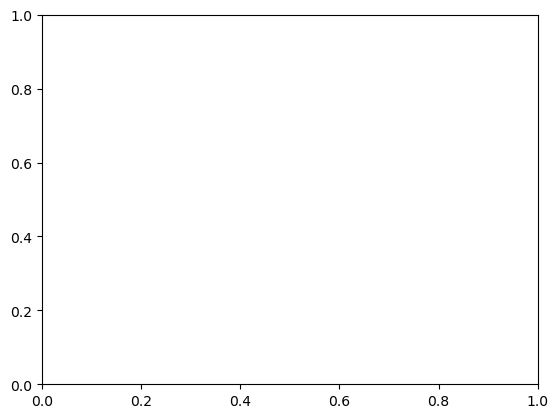

In [111]:
sns.kdeplot(dfs['Alcohol'])

In [115]:
print(dfs['Alcohol'].dtype)

object


In [117]:
dfs['Alcohol'] = pd.to_numeric(dfs['Alcohol'], errors='coerce')

In [119]:
print(dfs['Alcohol'].dtype)

float64


<Axes: xlabel='Alcohol', ylabel='Density'>

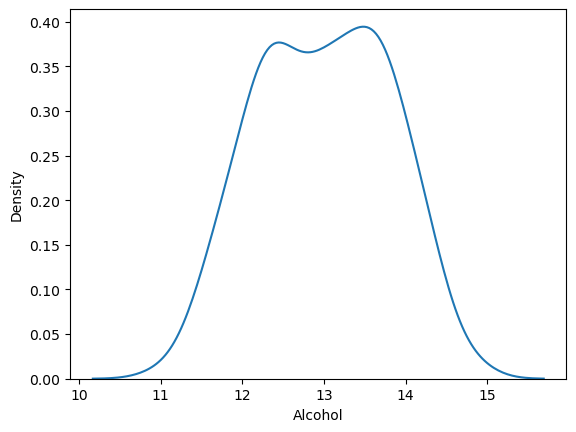

In [121]:
sns.kdeplot(dfs['Alcohol'])

In [129]:
dfs.dtypes

Class Label     object
Alcohol        float64
Malid Acid      object
dtype: object

In [131]:
dfs['Malid Acid'] = pd.to_numeric(dfs['Malid Acid'], errors='coerce')

In [133]:
dfs['Class Label'] = pd.to_numeric(dfs['Class Label'], errors='coerce')

In [135]:
dfs.dtypes

Class Label    float64
Alcohol        float64
Malid Acid     float64
dtype: object

In [137]:
dfs.isnull().sum()

Class Label    0
Alcohol        0
Malid Acid     0
dtype: int64

In [139]:
dfs = dfs.rename(columns={'Malid Acid': 'Malic Acid'})

In [141]:
dfs.head()

,Class Label,Alcohol,Malic Acid
0,1.0,14.23,1.71
1,1.0,13.20,1.78
2,1.0,13.16,2.36
3,1.0,14.37,1.95
4,1.0,13.24,2.59


<Axes: xlabel='Malic Acid', ylabel='Density'>

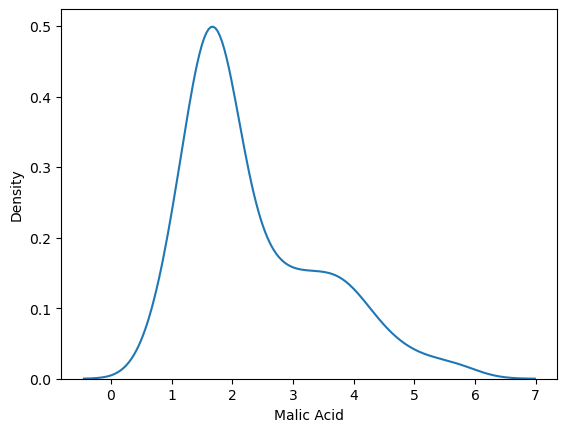

In [143]:
sns.kdeplot(dfs['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

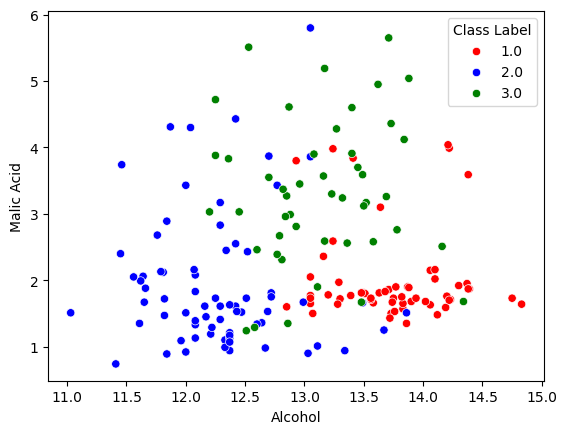

In [147]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x=dfs['Alcohol'], y=dfs['Malic Acid'], hue=dfs['Class Label'], palette=color_dict)

In [151]:
# Step 1 : Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [155]:
x = dfs[['Alcohol', 'Malic Acid']]
y = dfs['Class Label']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [159]:
X_train.head()

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
174,13.40,3.91
144,12.25,3.88
71,13.86,1.51


In [161]:
y_train.head()

22     1.0
108    2.0
174    3.0
144    3.0
71     2.0
Name: Class Label, dtype: float64

In [165]:
# scaling
minmax = MinMaxScaler()

In [173]:
x_train_scaled = minmax.fit_transform(X_train)
x_test_scaled = minmax.transform(X_test)

In [175]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = X_train.columns)

In [189]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [191]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = X_test.columns)

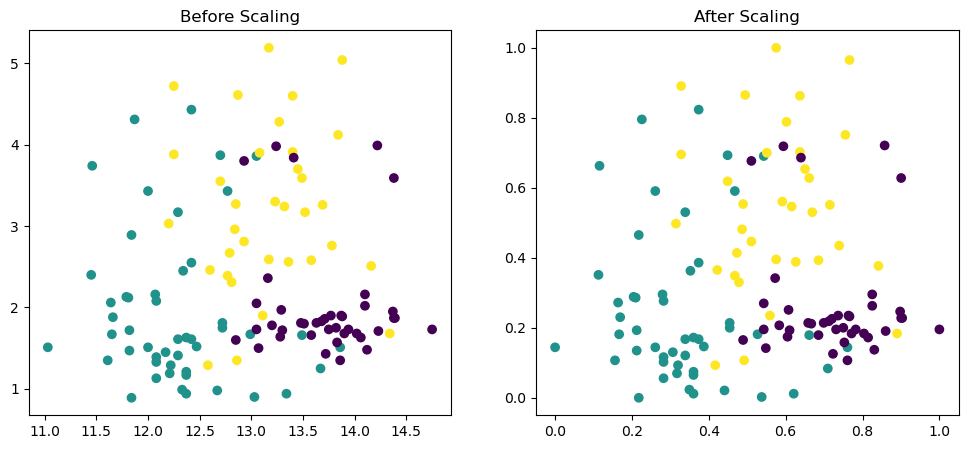

In [205]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()

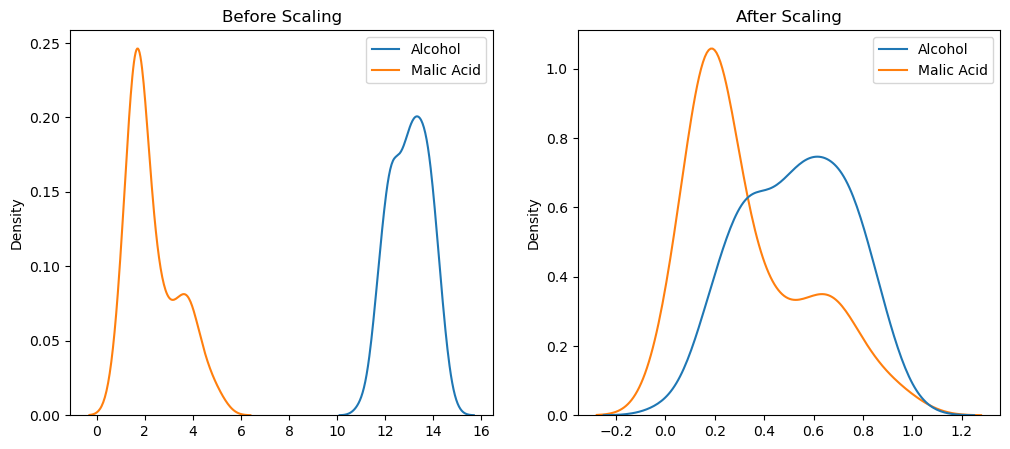

In [219]:
fig, (ax1, ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train , ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled , ax=ax2)
plt.show()